In [550]:
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [551]:
#precondition: col_names has an 'x' column
def read_csv_raw_datalakes(prof_name, col_names):
    df_raw = pd.read_csv(prof_name)
    df_raw = df_raw[col_names]
    df_raw.index = df_raw.x
    df_raw = df_raw.sort_index()
    return df_raw

In [552]:
def create_single_df(files_path, col_names):
    allfiles = os.listdir(files_path)
    filelist = [f for f in allfiles if f[-4:] == '.csv' and f[0] != '~']
    df_list = []
    for i in range(len(filelist)):
        df_list.append(read_csv_raw_datalakes(filelist[i], col_names))
    single_df = pd.concat(df_list)
    single_df.sort_index()
    return single_df

In [553]:
#precondition: index of df is timestamp
def add_datetime_to_df(df, name):
    variable_name = name +'_datetime'
    if name == 'skin':
        df[variable_name] = np.array([datetime.fromtimestamp(ts) for ts in df.index])
    if name == 'meteo':
        df[variable_name] = np.array([datetime.fromtimestamp(ts) for ts in df['meteo_timestamp']])

    return df

In [554]:
def cut_dataframes(df1, df2):
    timestamp_min = np.max([np.min(df1.index), np.min(df2.index)])-2*3600
    timestamp_max = np.min([np.max(df1.index),np.max(df2.index)])+2*3600
    df1 = df1[(df1.index > timestamp_min) & (df1.index < timestamp_max)]
    df2 = df2[(df2.index > timestamp_min) & (df2.index < timestamp_max)]
    return df1, df2

In [555]:
def matchup(df1, df2, df2_cols, df2_new_cols):
    df1.sort_index()
    df2.sort_index()

    for i in range(len(df2_cols)):
        df1[df2_new_cols[i]] = np.nan

    df1['meteo_timestamp'] = np.nan

    for i in range(len(df1)):#len(df1)
        ind_matchup = np.where(abs(df1.index[i]-df2.index)==min(abs(df1.index[i]-df2.index)))[0][0]

        for j in range(len(df2_cols)):
            df1.loc[df1.index[i], df2_new_cols[j]] = df2.loc[df2.index[ind_matchup-6:ind_matchup+6], df2_cols[j]].mean()

        df1.loc[df1.index[i], 'meteo_timestamp'] = df2.index[ind_matchup]
    return df1

In [556]:
geneva_skin_path = '/Users/olbu/Documents/uni/FS_23/WASY/project_code/data/Geneva/geneva_lex_skin_220323/'
geneva_meteo_path = '/Users/olbu/Documents/uni/FS_23/WASY/project_code/data/Geneva/geneva_lex_meteo_220323/'

aegeri_skin_path = '/Users/olbu/Documents/uni/FS_23/WASY/project_code/data/Aegeri/aegeri_skin_220323/'
aegeri_meteo_path = '/Users/olbu/Documents/uni/FS_23/WASY/project_code/data/Aegeri/aegeri_meteo_220323/'

In [557]:
geneva_cols_skin = ['x', 'y', 'y1', 'y4']
geneva_cols_meteo_1 = ['x', 'y', 'y1', 'y2', 'y3', 'y5', 'y6']
geneva_cols_meteo_2 = ['y', 'y1', 'y2', 'y3', 'y5', 'y6']
geneva_cols_meteo_names = ['air_temp', 'rel_humidity', 'sol_irr', 'wind_speed', 'rainfall', 'air_pressure']

In [558]:
os.chdir(geneva_skin_path)
path = os.getcwd()
geneva_skin_files = os.listdir(path)
geneva_skin_df = create_single_df(path, geneva_cols_skin)
display(geneva_skin_df)

,x,y,y1,y4
x,,,,
1652652000,1652652000,16.07,NaN,1
1652652300,1652652300,16.22,NaN,1
1652652600,1652652600,16.12,NaN,1
1652652900,1652652900,16.12,NaN,1
1652653200,1652653200,15.48,NaN,1
...,...,...,...,...
1657489200,1657489200,20.19,NaN,1
1657489500,1657489500,20.05,NaN,1
1657489800,1657489800,19.97,NaN,1


In [559]:
os.chdir(geneva_meteo_path)
path = os.getcwd()
geneva_meteo_files = os.listdir(path)
geneva_meteo_df = create_single_df(path, geneva_cols_meteo_1)
display(geneva_meteo_df)

,x,y,y1,y2,y3,y5,y6
x,,,,,,,
1603670400,1603670400,13.68,77.41,0.000,1.545,0.0,962.0
1603671000,1603671000,13.75,77.00,0.000,0.141,0.0,962.0
1603671600,1603671600,13.76,83.50,0.000,0.862,0.0,962.0
1603672200,1603672200,13.58,74.75,0.000,0.899,0.0,962.0
1603672800,1603672800,13.90,77.20,0.000,1.409,0.0,962.0
...,...,...,...,...,...,...,...
1630883400,1630883400,19.16,71.54,0.001,1.185,0.0,977.0
1630884000,1630884000,19.10,71.72,0.001,1.354,0.0,977.0
1630884600,1630884600,18.88,72.52,0.001,1.386,0.0,978.0


In [560]:
aegeri_cols_skin = ['x', 'y', 'y1']
aegeri_cols_meteo_1 = ['x', 'y', 'y1', 'y5', 'y6', 'y7']
aegeri_cols_meteo_2 = ['y', 'y1', 'y5', 'y6', 'y7']
aegeri_cols_meteo_names = ['air_temp', 'wind_speed', 'air_pressure', 'rel_humidity', 'sol_irr']

In [561]:
os.chdir(aegeri_skin_path)
path = os.getcwd()
aegeri_skin_files = os.listdir(path)
aegeri_skin_df = create_single_df(path, aegeri_cols_skin)
display(aegeri_skin_df)

,x,y,y1
x,,,
1.673827e+09,1.673827e+09,3.02,5.4126
1.673828e+09,1.673828e+09,2.31,5.4280
1.673828e+09,1.673828e+09,1.42,5.3449
1.673829e+09,1.673829e+09,2.23,5.3823
1.673830e+09,1.673830e+09,1.30,5.3983
...,...,...,...
1.670797e+09,1.670797e+09,-0.66,7.4359
1.670797e+09,1.670797e+09,-0.19,7.4126
1.670798e+09,1.670798e+09,0.34,7.4628


In [562]:
os.chdir(aegeri_meteo_path)
path = os.getcwd()
aegeri_meteo_files = os.listdir(path)
aegeri_meteo_df = create_single_df(path, aegeri_cols_meteo_1)
display(aegeri_meteo_df)

,x,y,y1,y5,y6,y7
x,,,,,,
1.674428e+09,1.674428e+09,-1.896333,3.196500,939.405000,82.516667,0.00
1.674429e+09,1.674429e+09,-1.952500,3.692000,939.405000,80.483333,0.00
1.674429e+09,1.674429e+09,-2.059500,2.652500,939.340000,79.383333,0.00
1.674429e+09,1.674429e+09,-1.995500,2.910333,939.363333,81.000000,0.00
1.674429e+09,1.674429e+09,-1.950167,3.327167,939.375000,81.583333,0.00
...,...,...,...,...,...,...
1.676847e+09,1.676847e+09,6.093167,0.578833,944.075000,86.400000,0.00
1.676847e+09,1.676847e+09,6.142167,0.586500,944.088333,86.000000,0.00
1.676847e+09,1.676847e+09,6.181667,0.660000,944.095000,86.000000,0.00


In [563]:
aegeri_skin_df.index = aegeri_skin_df.index.astype(int)

geneva_skin_df, geneva_meteo_df = cut_dataframes(geneva_skin_df, geneva_meteo_df)
aegeri_skin_df, aegeri_meteo_df = cut_dataframes(aegeri_skin_df, aegeri_meteo_df)
geneva_skin_df

,x,y,y1,y4
x,,,,
1652652000,1652652000,16.07,NaN,1
1652652300,1652652300,16.22,NaN,1
1652652600,1652652600,16.12,NaN,1
1652652900,1652652900,16.12,NaN,1
1652653200,1652653200,15.48,NaN,1
...,...,...,...,...
1657489200,1657489200,20.19,NaN,1
1657489500,1657489500,20.05,NaN,1
1657489800,1657489800,19.97,NaN,1


In [564]:
geneva_skin_meteo_matchup = matchup(geneva_skin_df, geneva_meteo_df, geneva_cols_meteo_2, geneva_cols_meteo_names)
display(geneva_skin_meteo_matchup)

KeyboardInterrupt: 

In [496]:
aegeri_skin_meteo_matchup = matchup(aegeri_skin_df, aegeri_meteo_df, aegeri_cols_meteo_2, aegeri_cols_meteo_names)
display(aegeri_skin_meteo_matchup)

,x,y,y1,air_temp,wind_speed,air_pressure,rel_humidity,sol_irr,meteo_timestamp


In [474]:
aegeri = aegeri_skin_meteo_matchup.copy()
aegeri = add_datetime_to_df(aegeri, 'skin')
aegeri = add_datetime_to_df(aegeri, 'meteo').sort_index()
aegeri.to_csv('/Users/olbu/Documents/uni/FS_23/WASY/project_code/data/output/aegeri_matchup_skin_meteo_v2.csv')

In [476]:
geneva = geneva_skin_meteo_matchup.copy()
geneva = add_datetime_to_df(geneva, 'skin')
geneva = add_datetime_to_df(geneva, 'meteo').drop(['y1', 'y4'], 1).sort_index()
geneva.to_csv('/Users/olbu/Documents/uni/FS_23/WASY/project_code/data/output/geneva_matchup_skin_meteo_v2.csv')


/var/folders/tg/xj2cj8vx7319_nt0480rbkm80000gn/T/ipykernel_760/1109458458.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  geneva.drop(['y1', 'y4'], 1)


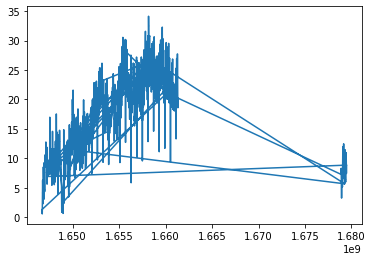